# Convolutional Neural Network on MNIST dataset using Keras

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

# Importing libraries and modules
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('tf')
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

## Loading MNIST data and preprocessing it

In [2]:
batch_size = 128 
num_classes = 10
epochs = 12

#input image dimensions
img_rows, img_cols = 28, 28

#the data, split between train and test sets
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

# Preprocessing the data
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the data

x_train /= 255
x_test /= 255
print('x_train.shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Creating a simple model with 2 Convolution layers

In [7]:
# Creating a simple model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics =['accuracy'])
          
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])         

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.2592 - acc: 0.9188 - val_loss: 0.0655 - val_acc: 0.9795
Epoch 2/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0884 - acc: 0.9737 - val_loss: 0.0437 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0661 - acc: 0.9802 - val_loss: 0.0389 - val_acc: 0.9859
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0541 - acc: 0.9835 - val_loss: 0.0346 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.0476 - acc: 0.9859 - val_loss: 0.0301 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0414 - acc: 0.9872 - val_loss: 0.0316 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.0381 - acc: 0.9884 - val_loss: 0.0302 - 

### Error plot : Epoch vs Loss

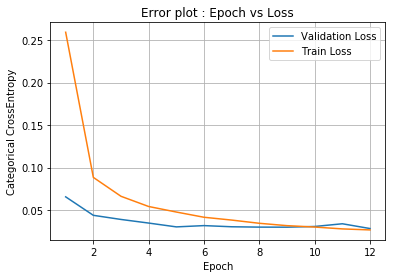

In [8]:
# Drawing Error plot

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical CrossEntropy')

x = list(range(1,epochs+1))

validation_y = history.history['val_loss']  # Code reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
train_y = history.history['loss']
ax.plot(x,validation_y, label='Validation Loss')
ax.plot(x,train_y, label="Train Loss")
plt.legend()
plt.grid()
plt.title("Error plot : Epoch vs Loss")
plt.show()

# Trying 3 different architectures

##1. Model with 3 Convolution Layers and 3X3 Kernel

In [10]:
droprate=0.25

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=input_shape))   # Conv Layer 1
model.add(BatchNormalization())              # With Batchnormalization
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu')) # Conv Layer 2
model.add(BatchNormalization())                 # With Batchnormalization
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(droprate))
model.add(Conv2D(64, (3,3), activation='relu')) # Conv Layer 3
model.add(BatchNormalization())                 # With Batchnormalization
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(droprate))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics =['accuracy'])
          
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

W0713 06:34:48.456474 140430962653056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.1681 - acc: 0.9484 - val_loss: 0.0414 - val_acc: 0.9862
Epoch 2/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0565 - acc: 0.9829 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 3/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.0396 - acc: 0.9872 - val_loss: 0.0405 - val_acc: 0.9858
Epoch 4/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0333 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0288 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0249 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0233 - val_ac

### Error plot : Epoch vs Loss

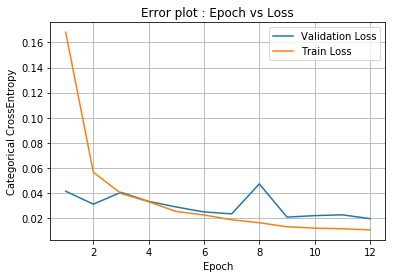

In [11]:
# Drawing Error plot

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical CrossEntropy')

x = list(range(1,epochs+1))

validation_y = history.history['val_loss']  # Code reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
train_y = history.history['loss']
ax.plot(x,validation_y, label='Validation Loss')
ax.plot(x,train_y, label="Train Loss")
plt.legend()
plt.grid()
plt.title("Error plot : Epoch vs Loss")
plt.show()

##2. Model with 5 Convolution Layers and 2x2 Kernel

In [14]:
# Without Batch normalization
droprate=0.50

model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), 
                 activation='relu', 
                 input_shape=input_shape))   # Conv Layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (2,2), activation='relu')) # Conv Layer 2
model.add(Dropout(droprate))

model.add(Conv2D(32, (2,2), activation='relu')) # Conv Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (2,2), activation='relu')) # Conv Layer 4
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(droprate))
          
model.add(Conv2D(64, (2,2), activation='relu')) # Conv Layer 5
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(droprate))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics =['accuracy'])
          
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.7865 - acc: 0.7372 - val_loss: 0.1354 - val_acc: 0.9573
Epoch 2/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.2720 - acc: 0.9195 - val_loss: 0.0913 - val_acc: 0.9720
Epoch 3/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.2055 - acc: 0.9389 - val_loss: 0.0642 - val_acc: 0.9786
Epoch 4/12
60000/60000 [==============================] - 5s 85us/step - loss: 0.1747 - acc: 0.9483 - val_loss: 0.0655 - val_acc: 0.9796
Epoch 5/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.1572 - acc: 0.9540 - val_loss: 0.0503 - val_acc: 0.9854
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.1417 - acc: 0.9583 - val_loss: 0.0476 - val_acc: 0.9858
Epoch 7/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.1292 - acc: 0.9620 - val_loss: 0.0445 - val_ac

###Error plot : Epoch vs Loss

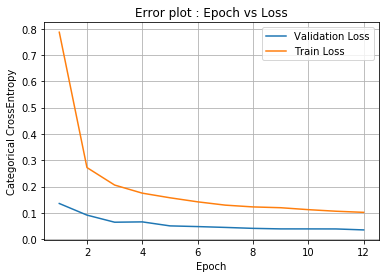

In [15]:
# Drawing Error plot

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical CrossEntropy')

x = list(range(1,epochs+1))

validation_y = history.history['val_loss']  # Code reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
train_y = history.history['loss']
ax.plot(x,validation_y, label='Validation Loss')
ax.plot(x,train_y, label="Train Loss")
plt.legend()
plt.grid()
plt.title("Error plot : Epoch vs Loss")
plt.show()

##3. Model with 7 Convolution Layers and 5x5 Kernel

In [36]:
#With Batch normalization
droprate=0.6

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), 
                 activation='relu', 
                 input_shape=input_shape))   # Conv Layer 1
model.add(BatchNormalization())              # With Batchnormalization

model.add(Conv2D(32, (5,5), activation='relu')) # Conv Layer 2
model.add(BatchNormalization())              # With Batchnormalization


model.add(Conv2D(32, (5,5), activation='relu')) # Conv Layer 3
model.add(BatchNormalization())              # With Batchnormalization


model.add(Conv2D(32, (5,5), activation='relu')) # Conv Layer 4
model.add(BatchNormalization())  # With Batchnormalization

model.add(Conv2D(32, (5,5), activation='relu')) # Conv Layer 5
model.add(BatchNormalization())                 # With Batchnormalization

model.add(Conv2D(32, (3,3), activation='relu')) # Conv Layer 6
model.add(BatchNormalization())             # With Batchnormalization
model.add(Dropout(droprate))

model.add(Conv2D(64, (5,5), activation='relu')) # Conv Layer 7
model.add(BatchNormalization())              # With Batchnormalization

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(droprate))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(droprate))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics =['accuracy'])
          
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 251us/step - loss: 0.6232 - acc: 0.8162 - val_loss: 0.2725 - val_acc: 0.9340
Epoch 2/12
60000/60000 [==============================] - 8s 142us/step - loss: 0.1343 - acc: 0.9669 - val_loss: 0.0646 - val_acc: 0.9836
Epoch 3/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0980 - acc: 0.9771 - val_loss: 0.0613 - val_acc: 0.9855
Epoch 4/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0808 - acc: 0.9809 - val_loss: 0.1190 - val_acc: 0.9761
Epoch 5/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0658 - acc: 0.9850 - val_loss: 0.0440 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 9s 142us/step - loss: 0.0604 - acc: 0.9871 - val_loss: 0.0655 - val_acc: 0.9843
Epoch 7/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0522 - acc: 0.9889 - val_loss: 0.0335 -

###Error plot : Epoch vs Loss

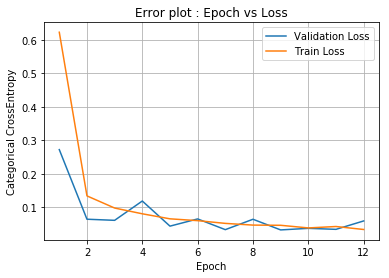

In [37]:
# Drawing Error plot

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical CrossEntropy')

x = list(range(1,epochs+1))

validation_y = history.history['val_loss']  # Code reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
train_y = history.history['loss']
ax.plot(x,validation_y, label='Validation Loss')
ax.plot(x,train_y, label="Train Loss")
plt.legend()
plt.grid()
plt.title("Error plot : Epoch vs Loss")
plt.show()

## Conclusion:

### Procedure Followed

STEP 1: Load MNIST image data and shuffle it into train and test sets.

STEP 2: Complete preprocessing the data including reshapping train, test sets and normalizing the data.

STEP 3: Define model architecture

STEP 4: Compile model

STEP 5: Fit the model on training data 

STEP 6: Evaluate the model on test data

STEP 7: Repeat the steps from 3 to 7 for 3 different model archtectures (3 Convolution layers, 5 Convolution layers and 7 Convolution layers with different kernel sizes, maxpool, dropouts, with or withour batch normalization)

STEP 8: Observe the test loss and test accuracy for each of the model and summarize them.

## Model performance comparision

In [39]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names=['S.No', 'No. of Convolution Layers','Kernel Size', 'Dropout','Test Loss', 'Test Accuracy']
x.add_row([1,3, '(3x3)',0.25, 0.0195,0.995 ])
x.add_row([2,5, '(2x2)',0.50, 0.0349,0.9894])
x.add_row([3,7, '(5x5)',0.60,0.0594,0.9877 ])
print(x)

+------+---------------------------+-------------+---------+-----------+---------------+
| S.No | No. of Convolution Layers | Kernel Size | Dropout | Test Loss | Test Accuracy |
+------+---------------------------+-------------+---------+-----------+---------------+
|  1   |             3             |    (3x3)    |   0.25  |   0.0195  |     0.995     |
|  2   |             5             |    (2x2)    |   0.5   |   0.0349  |     0.9894    |
|  3   |             7             |    (5x5)    |   0.6   |   0.0594  |     0.9877    |
+------+---------------------------+-------------+---------+-----------+---------------+


#### We can conclude that all the above 3 different architectures performed well and gave accuracy close to 99%. Test loss is less and accuracy is slightly more when drop out rate is less (0.25)